Saving traffic_accident_dataset_1200.csv to traffic_accident_dataset_1200.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("traffic_accident_dataset_1200.csv")
df.head()

,Accident_ID,Date,Day_of_Week,Time,City,Vehicle_Type,Road_Condition,Weather,Light_Condition,Cause,Accident_Severity
0,1,01-01-2023 00:00,Sunday,Night,Chennai,Bike,Snow,Rainy,Dark - Street Light,Mechanical Failure,Serious
1,2,01-01-2023 01:00,Thursday,Afternoon,Chennai,Auto,Snow,Storm,Daylight,Overspeed,Serious
2,3,01-01-2023 02:00,Friday,Evening,Delhi,Car,Dry,Rainy,Dark - No Light,Mechanical Failure,Fatal
3,4,01-01-2023 03:00,Sunday,Morning,Pune,Truck,Dry,Storm,Dark - No Light,Signal Jump,Minor
4,5,01-01-2023 04:00,Wednesday,Night,Chennai,Auto,Snow,Foggy,Daylight,Mechanical Failure,Serious


In [ ]:
print("Shape:", df.shape)
df.info()

Shape: (1200, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Accident_ID        1200 non-null   int64 
 1   Date               1200 non-null   object
 2   Day_of_Week        1200 non-null   object
 3   Time               1200 non-null   object
 4   City               1200 non-null   object
 5   Vehicle_Type       1200 non-null   object
 6   Road_Condition     1200 non-null   object
 7   Weather            1200 non-null   object
 8   Light_Condition    1200 non-null   object
 9   Cause              1200 non-null   object
 10  Accident_Severity  1200 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.3+ KB


In [ ]:
print("Shape:", df.shape)
df.info()

,0
Accident_ID,0
Date,0
Day_of_Week,0
Time,0
City,0
Vehicle_Type,0
Road_Condition,0
Weather,0
Light_Condition,0
Cause,0


In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
Serious,420
Fatal,399
Minor,381


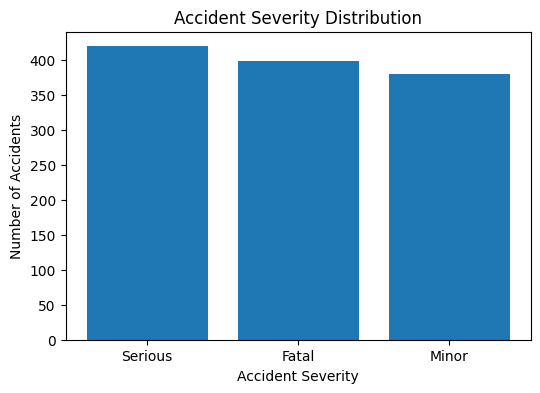

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(
    df['Accident_Severity'].value_counts().index.astype(str),
    df['Accident_Severity'].value_counts().values
)
plt.title("Accident Severity Distribution")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

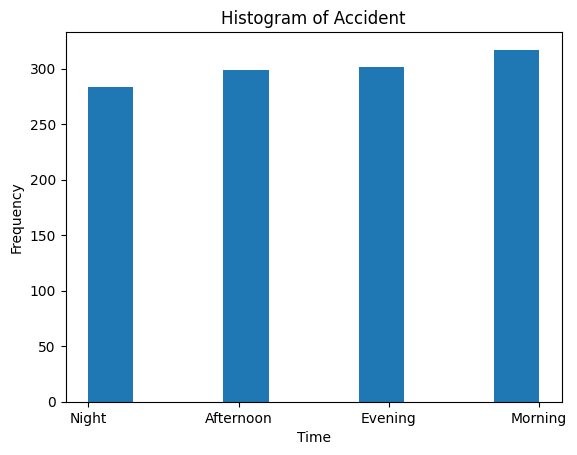

In [ ]:
plt.figure()
plt.hist(df['Time'], bins=10)
plt.title("Histogram of Accident")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

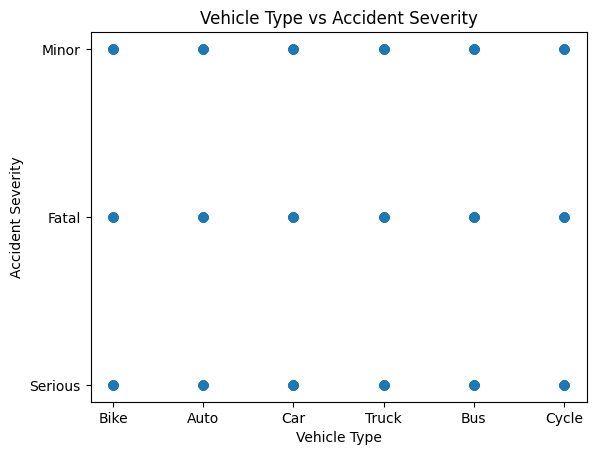

In [ ]:
plt.figure()
plt.scatter(df['Vehicle_Type'], df['Accident_Severity'])
plt.title("Vehicle Type vs Accident Severity")
plt.xlabel("Vehicle Type")
plt.ylabel("Accident Severity")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Severity_Label'] = le.fit_transform(df['Accident_Severity'])

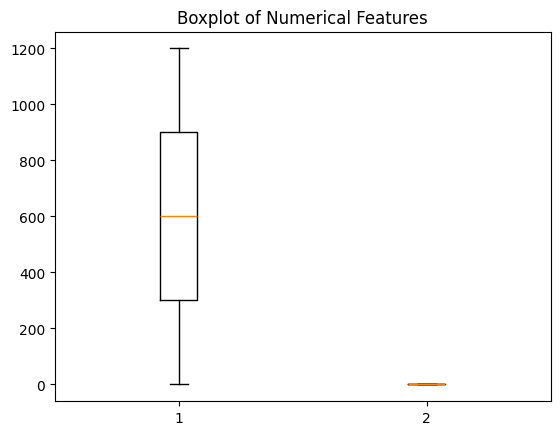

In [ ]:
plt.figure()
plt.boxplot(df.select_dtypes(include=np.number))
plt.title("Boxplot of Numerical Features")
plt.show()

In [ ]:
x = df.drop('Accident_Severity', axis=1)
y = df['Accident_Severity']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd


x = df.drop(['Accident_ID', 'Date', 'Accident_Severity', 'Severity_Label'], axis=1)
y = df['Severity_Label']


x = pd.get_dummies(x, drop_first=True, dtype=int)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr = lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

print("Linear Regresssion RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regresssion RMSE: 0.8492973609044244
Linear Regression R2 Score: -0.07928889510271686


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg.fit(x_train, y_train)
y_pred_rf_reg = rf_reg.predict(x_test)

print("Random Forest Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_reg)))
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf_reg))

Random Forest Regression RMSE: 0.8676371940292572
Random Forest Regression R2: -0.1264047722215007


In [ ]:
lf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(x_train, y_train)rf_c
y_pred_clf = rf_clf.predict(x_test)
y_prob_clf = rf_clf.predict_proba(x_test)

Random Forest Classifier Accuracy: 0.325


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_clf))

Accuracy: 0.325

Classification Report:

              precision    recall  f1-score   support

           0       0.41      0.32      0.36        94
           1       0.34      0.32      0.33        77
           2       0.24      0.33      0.28        69

    accuracy                           0.33       240
   macro avg       0.33      0.33      0.32       240
weighted avg       0.34      0.33      0.33       240



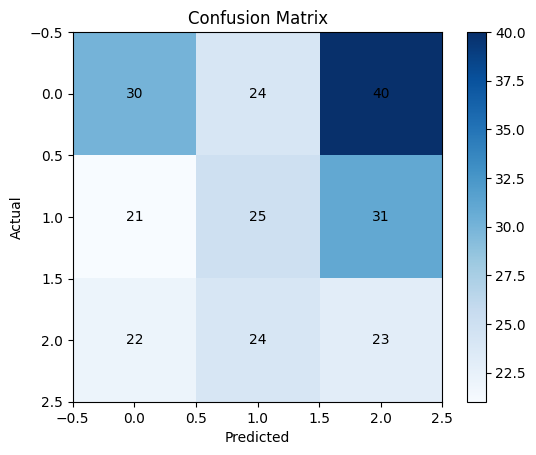

In [ ]:
cm = confusion_matrix(y_test, y_pred_clf)

plt.figure()
im = plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar(im)

for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()

In [ ]:
print("Regression Evaluation Meetrics")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_reg)))
print("R2 Score:", r2_score(y_test, y_pred_rf_reg))

Regression Evaluation Meetrics
RMSE: 0.8676371940292572
R2 Score: -0.1264047722215007
